# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

In [4]:
# Importa las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.

#Complementos con la dirección especifica de la base de datos que queremos.

def extraer_datos(root, database):
    csv_path = root + database
    return pd.read_csv(csv_path)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/refs/heads/main/"
MEDICAMENTOS = "Capitulo_3/drug200.csv"

df = extraer_datos(DOWNLOAD_ROOT, MEDICAMENTOS)



In [6]:
# Visualiza el DataFrame
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [9]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## <span style="color:green">2. Análisis de cada Variable</span>

Max Age: 74
Min Age: 15


<Figure size 900x500 with 0 Axes>

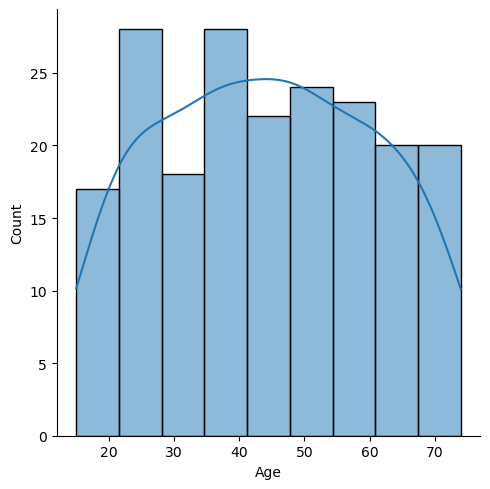

In [10]:
#Importa seaborn para tener gráficos más chidos 
#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())

#Crea un displot para de la edad (por ser una variable numérica)
import seaborn as sns
plt.figure(figsize = (9,5))
sns.displot(df.Age,kde=True)



In [11]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

<Axes: xlabel='BP', ylabel='Count'>

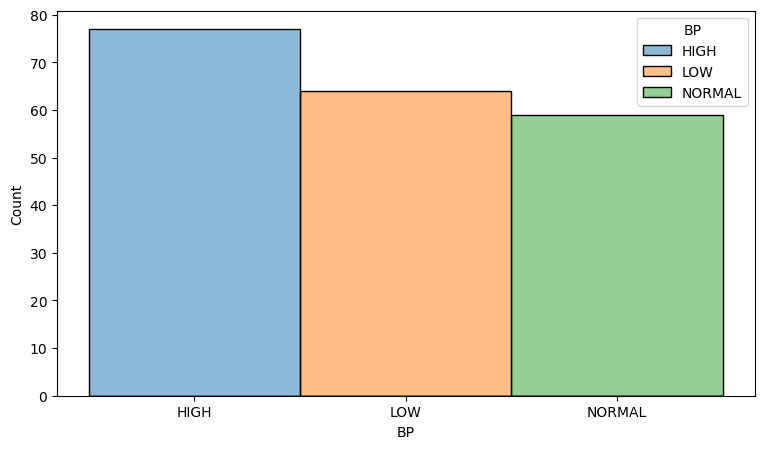

In [12]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="BP",hue="BP")


<Axes: xlabel='Cholesterol', ylabel='Count'>

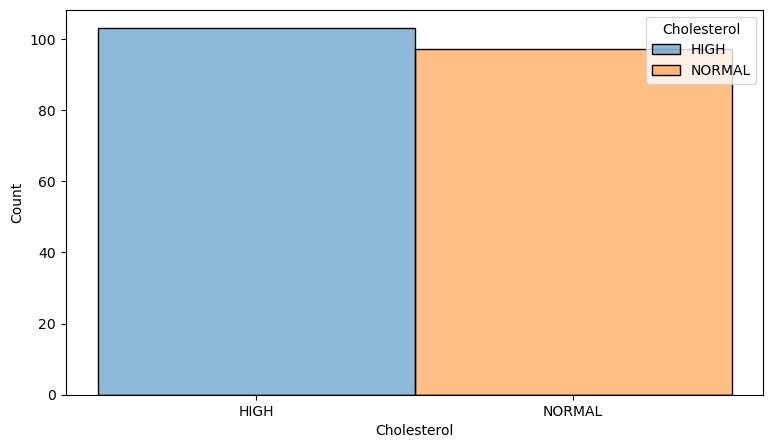

In [13]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="Cholesterol",hue="Cholesterol")

<Figure size 900x500 with 0 Axes>

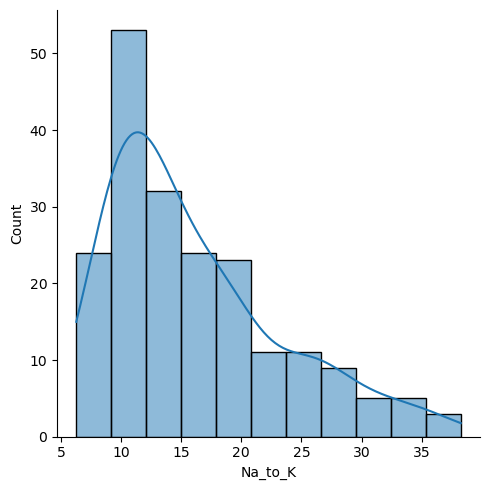

In [14]:
# Crea un displot para Sodio Potasio
plt.figure(figsize = (9,5))
sns.displot(df.Na_to_K,kde=True)


Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

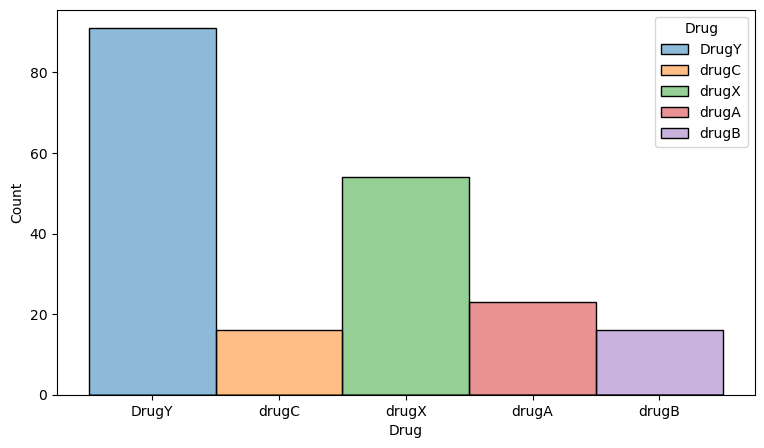

In [15]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊

#Cuenta los medicamentos
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="Drug",hue="Drug")
df.Drug.value_counts()



***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


Text(0.5, 1.0, 'Edad/Medicamento')

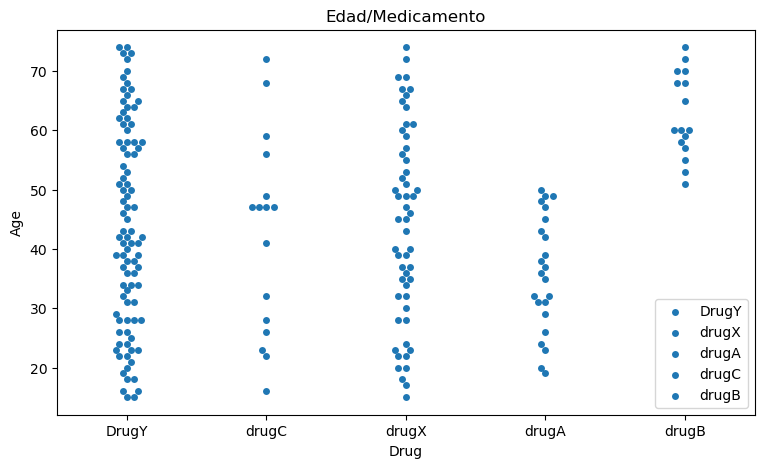

In [16]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Edad/Medicamento")


Text(0.5, 1.0, 'Género/Medicamento')

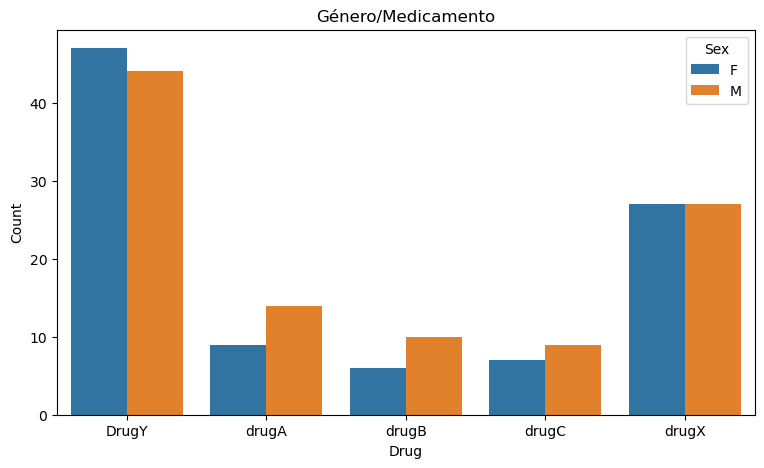

In [19]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Género/Medicamento")




Text(0.5, 1.0, 'Presión Sanguinea/Medicamentos')

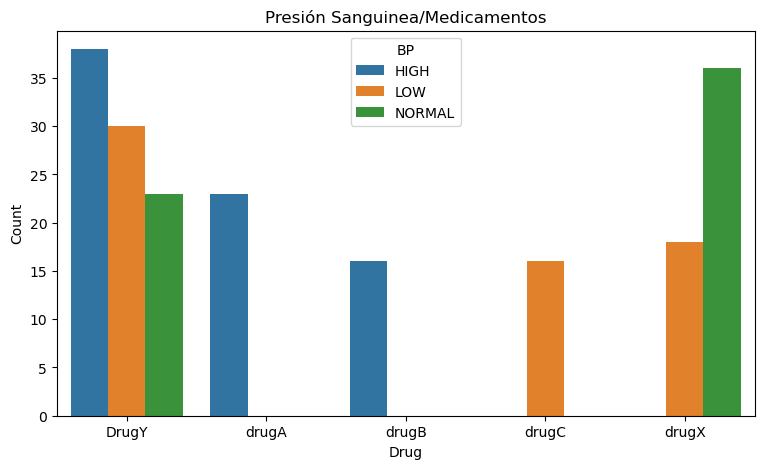

In [20]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("Presión Sanguinea/Medicamentos")


Text(0.5, 1.0, 'Cholesterol -- Drug')

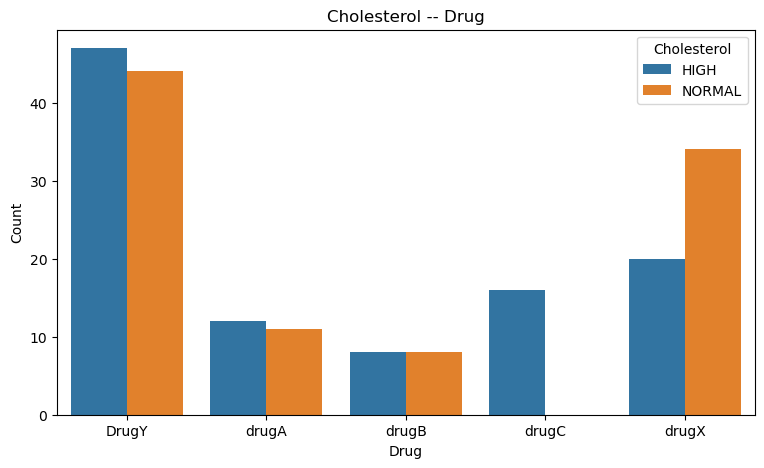

In [22]:
# Grafica (con una gráfica de barras)nla rdf_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")



Text(0.5, 1.0, 'Sodio-Potasio/Medicamentos')

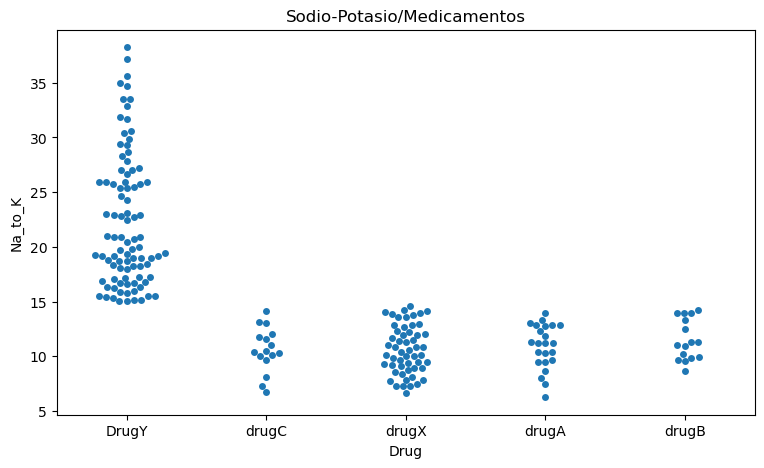

In [23]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Sodio-Potasio/Medicamentos")


***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [25]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder
def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])
variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]
for l in variables:
    label_encoder(l)
df.head()



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [38]:
# Crear set de entrenamiento y set de prueba
x = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)




El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [43]:
## Crear modelo para medicamento
y_train_c = (y_train == 3)
y_test_c = (y_test == 3)


Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [57]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(x_train,y_train_c)


SGDClassifier(random_state=42)

In [45]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.predict([[47,1,1,0,8]])

c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [46]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,x_train,y_train_c,cv=3,scoring="accuracy") 


array([0.85185185, 0.88679245, 0.9245283 ])

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [47]:
# Modelo que nunca es Y
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Drug"] = le.fit_transform(df["Drug"])

print(le.classes_)

[0 1 2 3 4]


***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [50]:
# Matriz de confusión
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd,x_train,y_train_c,cv=3)
#Importar confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_c,y_train_pred)



array([[142,   7],
       [ 11,   0]], dtype=int64)

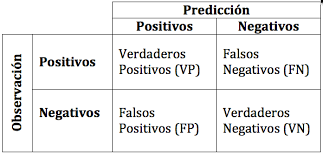

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [51]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score
p = precision_score(y_train_c,y_train_pred)
r = recall_score(y_train_c,y_train_pred)
p,r


(0.0, 0.0)

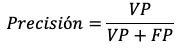

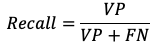

In [52]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train,y_train_c)
y_train_pred = cross_val_predict(rfc,x_train,y_train_c,cv=3)

#Hacer la matriz de confusión otra vez
confusion_matrix(y_train_c,y_train_pred)

array([[149,   0],
       [  8,   3]], dtype=int64)

In [54]:
#Calcular la precisión y recall con el nuevo clasificador 
p = precision_score(y_train_c,y_train_pred)
r = recall_score(y_train_c,y_train_pred)
p,r


(1.0, 0.2727272727272727)

In [55]:
#Calcular F1
from sklearn.metrics import f1_score

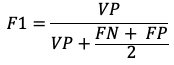

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [78]:
#Puntación de un paciente aleatorio
y_score = sgd.decision_function([[47, 1, 1, 0, 8]])
y_score
threshold = 0
y_some_pred = (y_score > threshold)

threshold = 2000
y_some_pred = (y_score > threshold)

y_scores = cross_val_predict(sgd,x_train,y_train_c,cv=3,method="decision_function")
precisions, recalls, umbrales = precision_recall_curve(y_train_c,y_scores)

c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


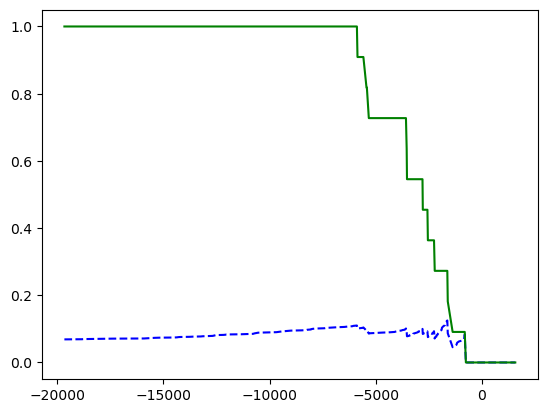

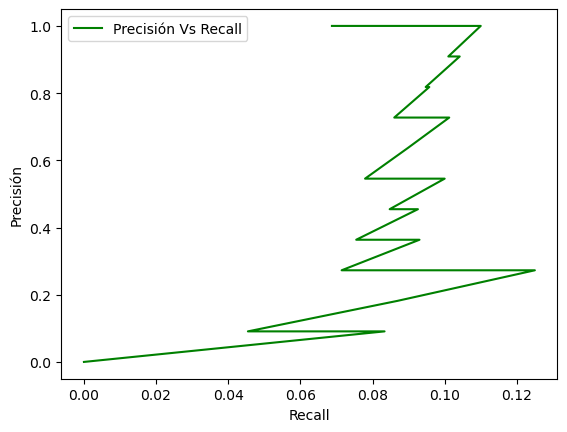

In [80]:
#Graficar la precisión y recall 

#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si
plt.plot(umbrales, precisions[:-1],"b--",label="Precisión")
plt.plot(umbrales, recalls[:-1],"g-",label="Recall")
plt.show()

plt.plot(precisions[:-1], recalls[:-1],"g-",label="Precisión Vs Recall")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.legend()
plt.show()




El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [86]:
#Supon que ya lo pensaste y querías un umbral  90 
umbral_90 = umbrales[np.argmax(precisions[:-1] >= 0.90)]
print("Umbral para precisión ≥ 90%:", umbral_90)


Umbral para precisión ≥ 90%: -19654.090008025018


In [87]:
#Arroja la precisión y recall para un umbral de 90
y_train_90 = (y_scores >= umbral_90)

***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [88]:
#Importar roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, umbrales = roc_curve(y_train_c,y_scores)


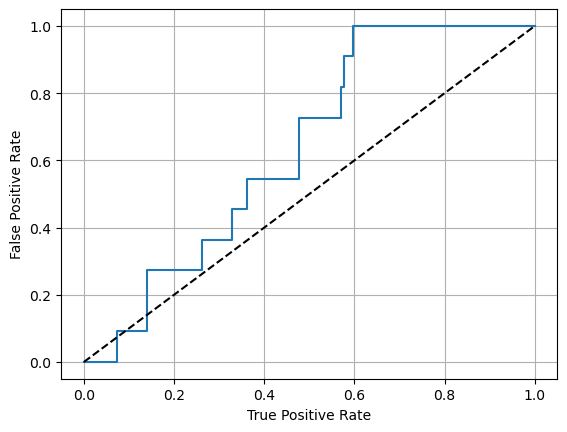

In [89]:
#Graficar la curva ROC

#Poner una cuadrícula
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.grid()
plt.show()



Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [90]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_c,y_scores)


0.6357535082367297

In [93]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc,x_train,y_train_c,cv=3,method="predict_proba")
y_scores_forest = y_forest[:,1]
fpr_forest, tpr_forest, umbral_forest = roc_curve(y_train_c, y_scores_forest)

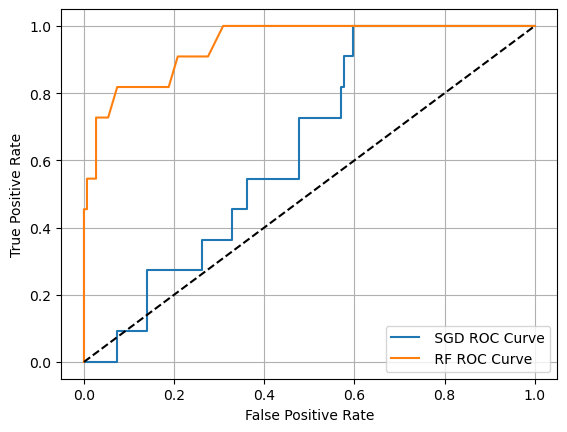

In [94]:
#Graficar la curva ROC y la predicción de random forest 
plt.plot(fpr, tpr, label=" SGD ROC Curve")
plt.plot(fpr_forest, tpr_forest, label=" RF ROC Curve")
plt.plot([0, 1],[0, 1], 'k--')
plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid()
plt.show()


In [96]:
#Calcular el puntaje (área bajo la curva) de random forest  
roc_auc_score(y_train_c,y_scores_forest)

0.9441732763880415

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [ ]:
# Importar SVC=Support Vector Classifier

from sklearn.svm import SVC

#Predecir a un humano aleatorio para ver que todo este funcionando bien 
svm = SVC()
svm.fit(x_train, y_train)
svm.predict([[25,0,1,0,167]])  




c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [106]:
#Utilizar decision_function para observar los puntajes de cada medicina 
some_scores = svm.decision_function([[25,0,1,0,167]])
#Decidirá por el qué tenga mayor puntaje
some_scores

c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 4.29349959,  1.78865857,  0.769853  , -0.27117688,  3.16304987]])

In [107]:
#Ahora, utiliza el clasificador multiclase 

#Predecir a un humano ahora con este clasificador
np.argmax(some_scores)

0

In [108]:
#Utilizar decision_function para observar los puntajes de cada medicina 
from sklearn.multiclass import OneVsRestClassifier
svm = OneVsRestClassifier(SVC())
svm.fit(x_train,y_train)
svm.predict([[25,0,1,0,167]])


c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [110]:
#campararlo con los datos obtenidos de sgd.fit 
some_scores = svm.decision_function([[25,0,1,0,167]])
some_scores


c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 2.3347801 , -1.0183752 , -1.01956626, -1.000855  , -1.08102198]])

***

## <span style="color:green">8. Analizar Errores</span>

In [111]:
#Hacer un clasificador de random forest
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)
conf_mz = confusion_matrix(y_train,y_train_pred)
conf_mz


array([[75,  0,  0,  1,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0,  7,  4],
       [ 0,  0,  0,  0, 43]], dtype=int64)

In [112]:
#Utilizar la matriz de confusión 
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]
df.head() 


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,1
2,47,1,1,0,43,3,1
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1


In [120]:
#utilizar ahora SGD
y_0 = (y_train == 0)
y_5 = (y_train == 5)
y_multi = np.c_[y_0,y_5]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_multi)
knn.predict([[45,0,1,0,89]])
y_train_pred = cross_val_predict(knn, x_train, y_multi, cv=3)
f1_score(y_multi,y_train_pred, average="macro")
y_train_pred = cross_val_predict(knn, x_train, y_multi, cv=3)
f1_score(y_multi,y_train_pred, average="weighted")




c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Perfil 1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.9868421052631579